In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv(r'E:\Self study\Data\mymoviedb.csv' , na_values= '?',lineterminator='\n')

In [3]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
data.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

#### **Features :**
- Release_Date: Date when the movie was released.
- Title: Name of the movie.
- Overview: Brief summary of the movie.
- Popularity: It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.
- Vote_Count: Total votes received from the viewers.
- Vote_Average: Average rating based on vote count and the number of viewers out of 10.
- Original_Language: Original language of the movies. Dubbed version is not considered to be original language.
- Genre: Categories the movie it can be classified as.
- Poster_Url: Url of the movie poster.

In [5]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
data.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

**Data does not contain null values**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# Movies Release Date 

In [8]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'] , infer_datetime_format= True, errors = 'coerce')

#### Are there movies with wrong date?🤔

In [9]:
#Getting future Dates 
today_date = dt.date.today()
Future_Movies = data[data['Release_Date'] > pd.to_datetime(today_date)]

In [10]:
Future_Movies

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
210,2023-04-06,Fast & Furious 10,The tenth installment in the Fast Saga.,181.216,0,0.0,en,"Action, Crime",https://image.tmdb.org/t/p/original/2DyEk84Xnb...
231,2022-04-22,Dragon Ball Super: Super Hero,"The Red Ribbon Army, an evil organization that...",170.551,0,0.0,ja,"Animation, Science Fiction, Action",https://image.tmdb.org/t/p/original/wFYXVMKWLA...
232,2022-08-25,After Ever Happy,The fourth installment in The After Universe. ...,169.964,0,0.0,en,Romance,https://image.tmdb.org/t/p/original/vWLyXOFm1C...
322,2022-05-04,Doctor Strange in the Multiverse of Madness,"Doctor Strange, with the help of mystical alli...",144.134,0,0.0,en,"Fantasy, Action, Adventure",https://image.tmdb.org/t/p/original/wRnbWt44nK...
402,2022-06-08,Jurassic World Dominion,"Four years after Isla Nublar was destroyed, di...",122.236,0,0.0,en,"Adventure, Action, Science Fiction, Thriller",https://image.tmdb.org/t/p/original/blO6k1NsYg...
414,2023-06-23,The Flash,The Flash travels back in time to prevent the ...,119.846,0,0.0,en,"Action, Adventure, Science Fiction, Fantasy, D...",https://image.tmdb.org/t/p/original/oduJooXJya...
457,2022-04-07,Fantastic Beasts: The Secrets of Dumbledore,In an effort to thwart Grindelwald's plans of ...,111.367,0,0.0,en,"Fantasy, Adventure",https://image.tmdb.org/t/p/original/rTfNLKWrPZ...
917,2022-10-07,Spider-Man: Across the Spider-Verse (Part One),Miles Morales returns for the next chapter of ...,69.174,0,0.0,en,"Animation, Action, Science Fiction, Comedy, Ad...",https://image.tmdb.org/t/p/original/l2hjrByNNo...
1061,2022-12-14,Avatar 2,Twelve years after exploring Pandora and joini...,63.250,0,0.0,en,"Action, Adventure, Science Fiction, Fantasy",https://image.tmdb.org/t/p/original/uh4xY5eWCy...
1158,2023-03-17,Aquaman and The Lost Kingdom,"When an ancient power is unleashed, Aquaman mu...",59.539,0,0.0,en,"Adventure, Action, Fantasy",https://image.tmdb.org/t/p/original/M2diAjJukA...


In [11]:
#Getting Old Dates movies
Old_Movies = data[data['Release_Date'] < pd.to_datetime('1920-1-1')]

In [12]:
Old_Movies

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
6084,1902-04-17,A Trip to the Moon,Professor Barbenfouillis and five of his colle...,18.356,1284,8.0,fr,"Adventure, Fantasy, Science Fiction",https://image.tmdb.org/t/p/original/9o0v5LLFk5...


**Conclution :**
- No movies have wrong date in past or in future 
- Movies with Dates in future will be released soon
- Movies with Dates in past are correct
- Data seems to have no wrong dates

# Title

In [13]:
Repeated_rows = data.duplicated()
Repeated_rows.unique()

array([False])

Data does not have any duplicated rows

### Are there rows with same Title?

In [14]:
#Getting Movies with same title
duplicates = data.duplicated(subset = 'Title',keep = False)
data[duplicates].sort_values(by = 'Title')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
3270,2015-05-22,365 Days,This film tracks a hasty marriage through its ...,28.341,12,4.8,te,Romance,https://image.tmdb.org/t/p/original/AoFyZGDgfr...
1424,2020-02-07,365 Days,"A woman falls victim to a dominant mafia boss,...",52.418,6540,7.0,pl,"Drama, Romance",https://image.tmdb.org/t/p/original/6KwrHucIE3...
5993,1984-10-09,A Christmas Carol,A bitter old miser who makes excuses for his u...,18.546,241,7.3,en,"Drama, Fantasy, TV Movie, Family",https://image.tmdb.org/t/p/original/kGmpIkjVRW...
2052,2009-11-04,A Christmas Carol,Miser Ebenezer Scrooge is awakened on Christma...,39.916,3732,6.9,en,"Animation, Family, Drama, Fantasy",https://image.tmdb.org/t/p/original/goHDZUnqZJ...
2169,2010-04-30,A Nightmare on Elm Street,The film that brings back horror icon Freddy K...,38.399,2187,5.5,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/4W2GvVM89X...
...,...,...,...,...,...,...,...,...,...
985,2003-05-30,Wrong Turn,Chris crashes into a carload of other young pe...,66.173,1978,6.3,en,"Horror, Thriller",https://image.tmdb.org/t/p/original/ixBGcbQKvl...
8978,2011-09-09,Wuthering Heights,"Yorkshire moorlands, northern England, in the ...",14.157,182,5.9,en,"Drama, Romance",https://image.tmdb.org/t/p/original/7gEcoCve3l...
7409,1939-04-07,Wuthering Heights,The Earnshaws are Yorkshire farmers during the...,16.080,189,7.3,en,"Drama, Romance",https://image.tmdb.org/t/p/original/tA3ZaItWqh...
1887,2020-07-24,"Yes, God, Yes","Alice, a young innocent Catholic girl, is temp...",42.470,353,6.4,en,"Comedy, Drama",https://image.tmdb.org/t/p/original/69SYznq2mS...


**Conclusion :**
- Rows with same title are movies porducted in diffrent years

# Year

In [15]:
data['year'] = data['Release_Date'].dt.year
data['month'] = data['Release_Date'].dt.month

In [16]:
data.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,year,month
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,12
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,3


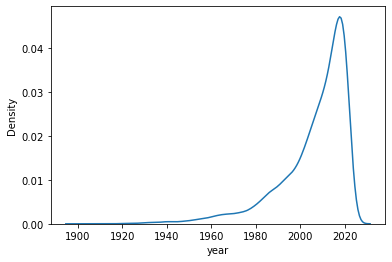

In [17]:
sns.kdeplot(data.year);

### What is the year with the most movies released in?

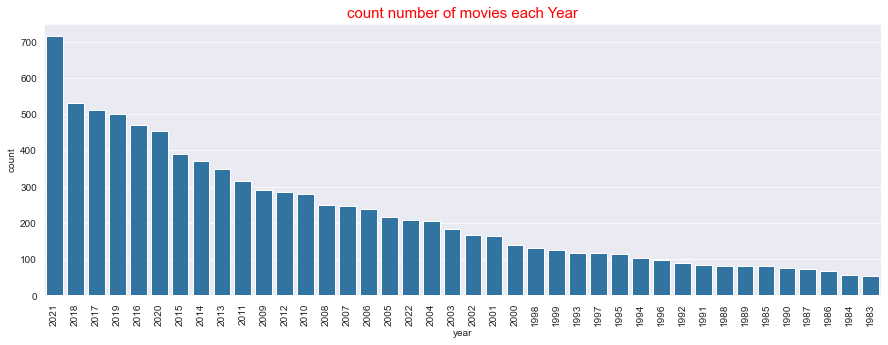

In [18]:
year_index = data['year'].value_counts(ascending= False).index[:40]
sns.set_style('darkgrid')
base_color = sns.color_palette()[0]
plt.figure(figsize=(15,5))
sns.countplot(x = 'year'  , data = data  , color = base_color , order= year_index)
plt.xticks(rotation = 90)
plt.title('count number of movies each Year',color = 'r',fontsize= 15);

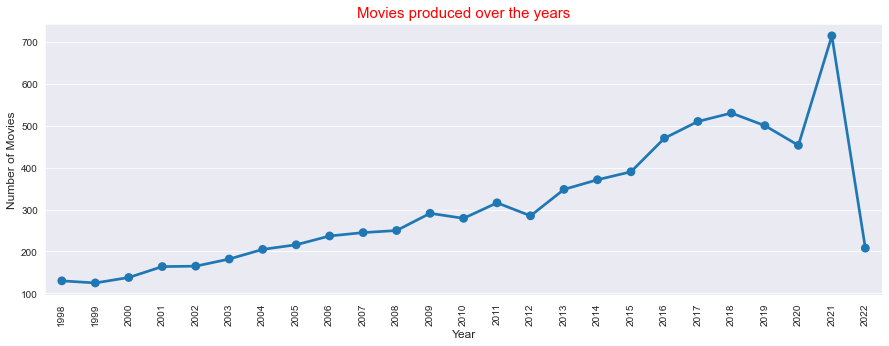

In [19]:
year_index = data['year'].value_counts().index[:25]
year_values = data['year'].value_counts().values[:25]
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
plt.xlabel("Year" , size = 12)
plt.ylabel('Number of Movies', size = 12)
plt.title("Movies produced over the years" , color = 'r' , size = 15)
sns.pointplot(x = year_index , y = year_values);

**Conclusion :**
- 2021 is the year with the most movies released in with 700+
- while movies before 2005 are lower with 300-

# Genres

In [20]:
data['Genre'] = data['Genre'].str.split(', ')
data.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,year,month
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"[Action, Adventure, Science Fiction]",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,12
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"[Crime, Mystery, Thriller]",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,3
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,[Thriller],https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022,2
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"[Animation, Comedy, Family, Fantasy]",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021,11
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"[Action, Adventure, Thriller, War]",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021,12


In [21]:
sep_genre = data.explode("Genre")
sep_genre

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,year,month
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,12
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,12
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,12
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,3
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,3
...,...,...,...,...,...,...,...,...,...,...,...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,Drama,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021,3
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,History,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021,3
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,War,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...,1984,9
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...,1984,9


In [22]:
sep_genre['Genre'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Crime', 'Mystery',
       'Thriller', 'Animation', 'Comedy', 'Family', 'Fantasy', 'War',
       'Horror', 'Drama', 'Music', 'Romance', 'Western', 'History',
       'TV Movie', 'Documentary'], dtype=object)

In [23]:
genre_index = sep_genre['Genre'].value_counts(ascending= False)
pd.DataFrame(genre_index).head()

,Genre
Drama,3744
Comedy,3031
Action,2686
Thriller,2488
Adventure,1853


### What is the genre of most of the movies ?

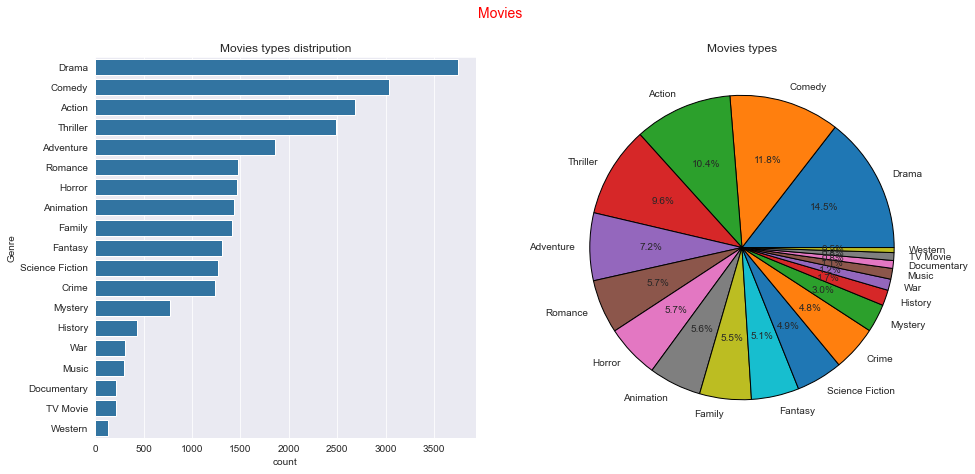

In [24]:
genre_index = sep_genre["Genre"].value_counts(ascending = False).index
genre_values = sep_genre["Genre"].value_counts(ascending = False).values
labels = genre_index

fig , axis = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y = sep_genre['Genre'], color = base_color,order = genre_index , ax= axis [0] )
#autopct to add percentages in pie
plt.pie(genre_values ,labels = labels, autopct = '%1.1f%%', startangle=0, wedgeprops={'edgecolor' : 'black'}) 

plt.title("Movies types")
plt.suptitle("Movies" , color = 'r' , size = 14)
axis[0].set_title('Movies types distripution');

Drama is the most genre type

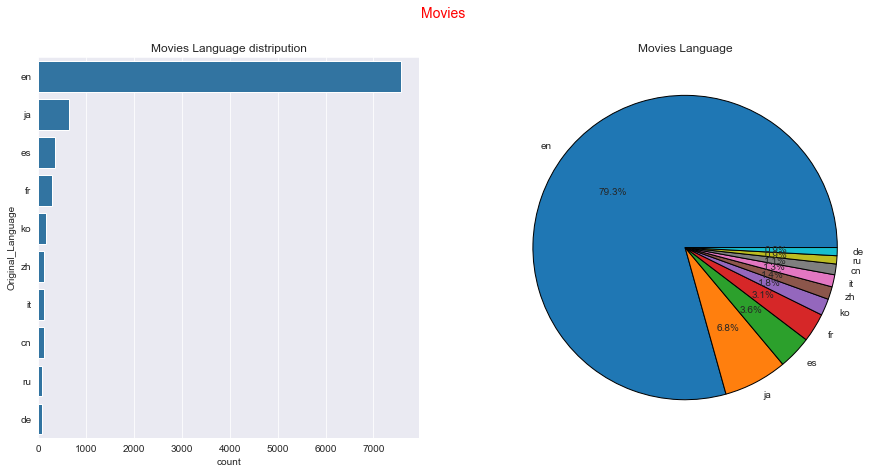

In [25]:
Original_Language_index = data["Original_Language"].value_counts(ascending = False).index[:10]
Original_Language_values = data["Original_Language"].value_counts(ascending = False).values[:10]
labels = Original_Language_index

fig , axis = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y = data['Original_Language'], color = base_color,order = Original_Language_index , ax= axis [0] )
#autopct to add percentages in pie
plt.pie(Original_Language_values ,labels = labels, autopct = '%1.1f%%', startangle=0, wedgeprops={'edgecolor' : 'black'}) 

plt.title("Movies Language")
plt.suptitle("Movies" , color = 'r' , size = 14)
axis[0].set_title('Movies Language distripution');

### what is the most popular movie?

In [26]:
data[["Title","Popularity", "Genre"]].sort_values(by="Popularity", ascending=False)

,Title,Popularity,Genre
0,Spider-Man: No Way Home,5083.954,"[Action, Adventure, Science Fiction]"
1,The Batman,3827.658,"[Crime, Mystery, Thriller]"
2,No Exit,2618.087,[Thriller]
3,Encanto,2402.201,"[Animation, Comedy, Family, Fantasy]"
4,The King's Man,1895.511,"[Action, Adventure, Thriller, War]"
...,...,...,...
9822,Badlands,13.357,"[Drama, Crime]"
9823,Violent Delights,13.356,[Horror]
9824,The Offering,13.355,"[Mystery, Thriller, Horror]"
9825,The United States vs. Billie Holiday,13.354,"[Music, Drama, History]"


Spider man is the most popular movie which is (Action, Adventure , Science Fiction)

In [27]:
popularity_mean = data.groupby('year').mean()['Popularity']
popularity_mean.tail()

year
2020     42.191951
2021    115.252629
2022    223.867346
2023     60.779125
2024     27.987000
Name: Popularity, dtype: float64

In [28]:
popularity_median = data.groupby('year').median()['Popularity']
popularity_median.tail()

year
2020    24.1720
2021    50.7265
2022    33.0735
2023    38.4870
2024    27.9870
Name: Popularity, dtype: float64

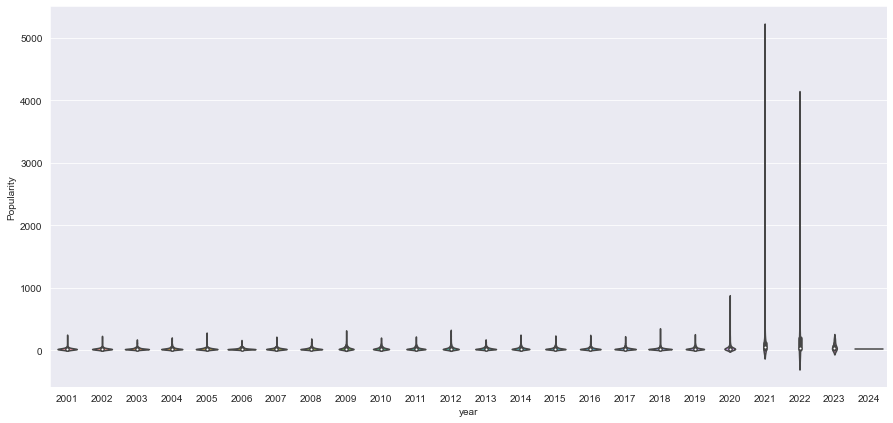

In [29]:
year_data = data[data['year'] > 2000 ]
plt.figure(figsize=(15,7))
sns.violinplot(x = 'year' , y = 'Popularity' ,data = year_data);

In [30]:
a = sep_genre.sort_values(by="Popularity", ascending=False)
a[['Title' , 'Popularity' , 'Genre']]

,Title,Popularity,Genre
0,Spider-Man: No Way Home,5083.954,Action
0,Spider-Man: No Way Home,5083.954,Science Fiction
0,Spider-Man: No Way Home,5083.954,Adventure
1,The Batman,3827.658,Crime
1,The Batman,3827.658,Thriller
...,...,...,...
9825,The United States vs. Billie Holiday,13.354,Drama
9825,The United States vs. Billie Holiday,13.354,History
9826,Threads,13.354,War
9826,Threads,13.354,Drama


C:\Users\Ghazy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


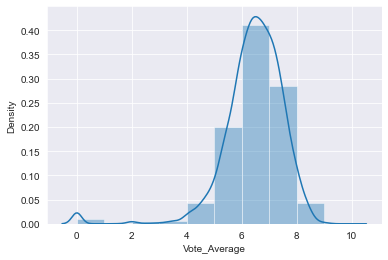

In [31]:
sns.distplot(data["Vote_Average"] , bins = 10);

C:\Users\Ghazy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


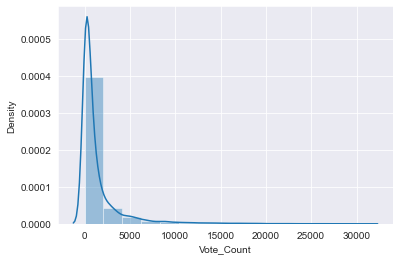

In [32]:
sns.distplot(data["Vote_Count"] , bins = 15);

**Conclusion :**
- Movies vote average is skewed to the left with highest values at 6 and 7
- Most movies have vote_Counts nearly to zero